In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


🧾 Dataset: Titanic - Disaster Meets Data
This dataset is a time-traveling snapshot from 1912, capturing details of passengers aboard the RMS Titanic, the "unsinkable" ship that said “hold my beer” to that claim.

📦 What's Inside?

Column Name	Description

`PassengerId:`	Just a boring serial number. Nothing fancy.

`Survived :`	0 = Nope 😵, 1 = Yep😌

`Pclass`:	Ticket class: 1st = Boujee, 2nd = Meh, 3rd = Peasant-tier

`Name`:	Includes title, so you can judge them by it.

`Sex`:	Male or Female. Spoiler: it mattered. A lot.

`Age`:	Years. Babies were involved too, just to tug at your heartstrings.

`SibSp`:	Number of siblings/spouses aboard. Who they were stuck with.

`Parch`:	Parents/children aboard. Family trip, yay?

`Ticket`:	Random string of letters/numbers. We pretend it means something.

`Fare`:	How much they paid. Some paid a lot to freeze.

`Cabin`:	Their room. Most didn’t have one (or it wasn’t recorded).

`Embarked`:	Where they got on: C = Cherbourg, Q = Queenstown, S = Southampton


Issues with the dataset :

Messy Data :

1. Lots of missing values in `age`, `cabin`, `embarked` column.

2. Name should be split in title, surname.

3. So much unique value name lady, ms., sir, mme.

4. Could be combine `sibsp` and `parch` column.

Dirty Data :

1. Name given in wrong format in all column and name.

2. wrong dtype for age column.



In [ ]:
df1 = df.copy()

In [ ]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1.sample(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
262,263,0,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S
393,394,1,1,"Newell, Miss. Marjorie",female,23.00,1,0,35273,113.2750,D36,C
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.00,0,2,PP 9549,16.7000,G6,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.00,0,0,7540,8.6542,NaN,S


In [ ]:
df1.columns = df1.columns.str.lower()

In [ ]:
df1 = df1.set_index('passengerid')

In [ ]:
df1['survived'].value_counts()

,count
survived,
0,549
1,342


In [ ]:
(df1['survived'].value_counts(normalize=True))*100

,proportion
survived,
0,61.616162
1,38.383838


In [ ]:
df1['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


In [ ]:
df1['title'] = df1['name'].str.strip().str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [ ]:
df1['title'] = df1['title'].str.lower()

In [ ]:
df1['title'].value_counts()

,count
title,
mr.,519
miss.,185
mrs.,128
master.,40
dr.,7
rev.,6
col.,2
major.,2
don.,1


In [ ]:
df1['title'] = df1['title'].replace({
    'mlle.': 'miss.'
})


In [ ]:
df1['title'] = df1['title'].replace({
    'mme.': 'mrs.'
})


In [ ]:
df1['title'] = df1['title'].replace({'lady.': 'mrs.'})


In [ ]:
df1['title'] = df1['title'].replace({'ms.': 'miss.'})


In [ ]:
df1['title'] = df1['title'].replace({'sir.': 'mr.'})


In [ ]:
df1['title'] = df1['title'].replace({'the': 'mrs.'})


In [ ]:
df1['title'] = df1['title'].replace({'jonkheer.': 'mr.'})


In [ ]:
df1['surname'] = df1['name'].str.strip().str.split(',').str.get(0).str.strip()

In [ ]:
df1['surname'] = df1['surname'].str.lower()

In [ ]:
import re

def extract_real_name(name):
    # Try to get name inside brackets first
    match = re.search(r'\(([^)]+)\)', name)
    if match:
        return match.group(1).strip()
    else:
        try:
            # Extract first name normally, but with safety checks
            return name.split(',')[1].split('.')[1].strip()
        except IndexError:
           return name  # fallback: return original if structure is weird

df1['name'] = df1['name'].apply(extract_real_name)



In [ ]:
df1['name'] = df1['name'].str.lower()

In [ ]:
df['sex'].value_counts()

,count
sex,
male,577
female,314


In [ ]:
df1['sex'] = df['sex'].str.lower().str.strip()

In [ ]:
df1['age'].isnull().sum()

np.int64(0)

In [ ]:
# Calculate mean age for each title group
title_age_map = df1.groupby('title')['age'].mean()

# Fill missing ages using the title-based averages
df1['age'] = df1.apply(
    lambda row: title_age_map[row['title']] if pd.isna(row['age']) else row['age'],
    axis=1
)


In [ ]:
df1['age'] = df1['age'].astype(int)

In [ ]:
df1['sibsp'].value_counts()

,count
sibsp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
df1['parch'].value_counts()

,count
parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [ ]:
df1['family_size'] =  df1['sibsp'] + df1['parch'] + 1

In [ ]:
df1['family_size'] = df1['family_size'].astype(int)

In [ ]:
# Create a column showing how many passengers share each ticket
df1['ticket_group_size'] = df1.groupby('ticket')['ticket'].transform('count')


In [ ]:
df1['fare'].describe()

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [ ]:
# Calculate fare per person by dividing total fare by ticket group size
df1['fare_per_person'] = df1['fare'] / df1['ticket_group_size']


In [ ]:
df1['cabin'].isna().sum()

np.int64(687)

In [ ]:
df1['deck'] =  df1['cabin'].str.get(0)

In [ ]:
df1['deck'].value_counts()

,count
deck,
C,60
B,47
D,33
E,32
A,15
F,13
G,4


In [ ]:
# Replace 'T' in the 'deck' column with 'C' based on fare similarity
df1['deck'] = df1['deck'].replace('T', 'C')


In [ ]:
df1[df1['embarked'].isna()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,surname,family_size,ticket_group_size,fare_per_person,deck
passengerid,,,,,,,,,,,,,,,,,


In [ ]:
df1.loc[62, 'embarked'] = 'S'

In [ ]:
df1.loc[830, 'embarked'] = 'S'

In [ ]:
df1.to_csv('titanic_cleaned.csv', index = False)

In [3]:
df = pd.read_csv('/content/titanic_cleaned.csv')
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,surname,family_size,ticket_group_size,fare_per_person,deck
0,0,3,owen harris,male,22,1,0,A/5 21171,7.2500,NaN,S,mr.,braund,2,1,7.2500,NaN
1,1,1,florence briggs thayer,female,38,1,0,PC 17599,71.2833,C85,C,mrs.,cumings,2,1,71.2833,C
2,1,3,laina,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,miss.,heikkinen,1,1,7.9250,NaN
3,1,1,lily may peel,female,35,1,0,113803,53.1000,C123,S,mrs.,futrelle,2,2,26.5500,C
4,0,3,william henry,male,35,0,0,373450,8.0500,NaN,S,mr.,allen,1,1,8.0500,NaN


So, the dataset is now clean and we're ready to do some analysis.

Univariate Analysis:

Numerical Columns :  age, sibsp, parch, fare, family_size.

Categorical Columns : Survived, pclass, sex, embarked, title

<Axes: xlabel='age', ylabel='Count'>

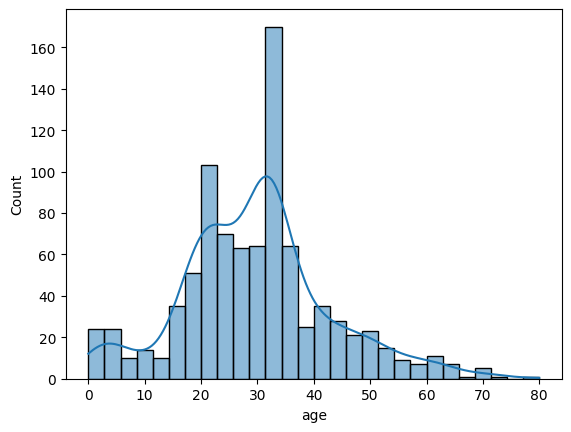

In [8]:
sns.histplot(df['age'], kde = True)

<Axes: ylabel='age'>

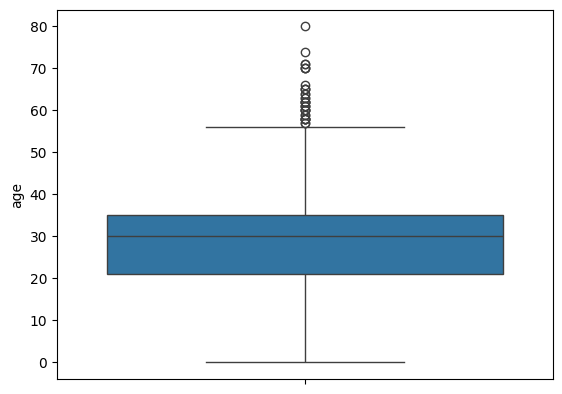

In [9]:
sns.boxplot(df['age'])

Majority of passengers were flying solo (0 siblings/spouses) — the lone wolf gang 🐺

A good number had 1 or 2, but it sharply drops after that.

There's a rare family reunion vibe with some people having 3–5 sibs/spouses onboard!

<Axes: xlabel='sibsp', ylabel='Count'>

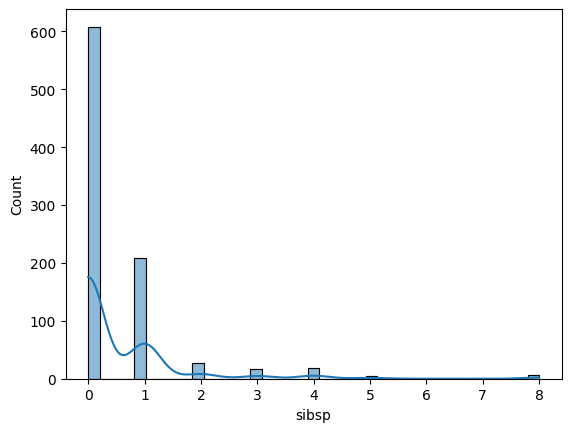

In [10]:
sns.histplot(df['sibsp'], kde = True)

Text(0.5, 0, 'Sibsp')

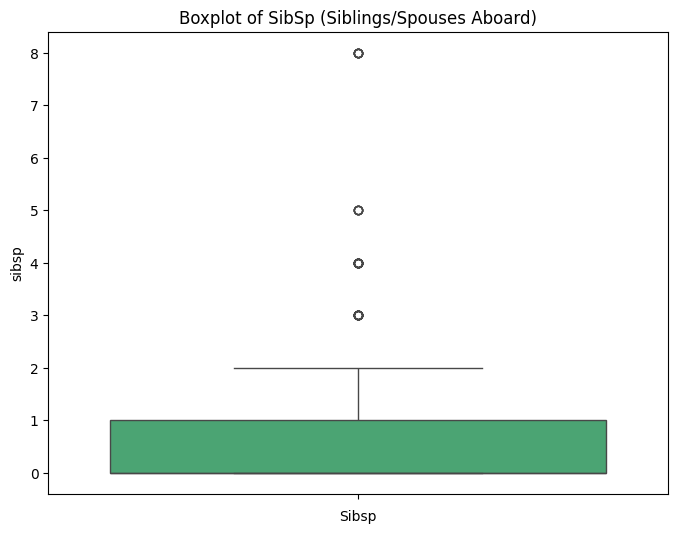

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(df['sibsp'], color = 'mediumseagreen')
plt.title('Boxplot of SibSp (Siblings/Spouses Aboard)')
plt.xlabel('Sibsp')

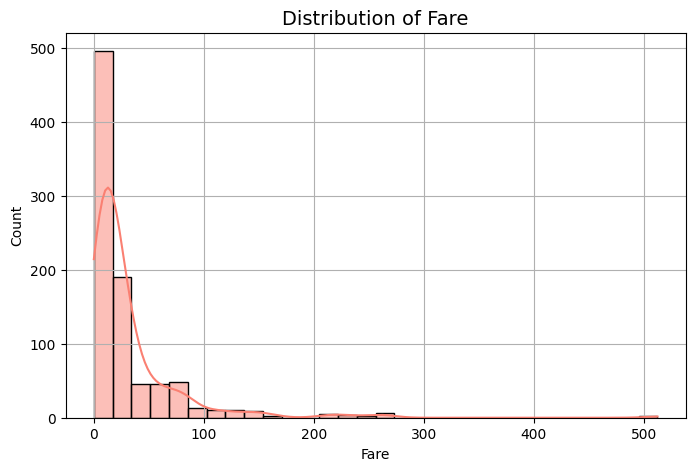

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['fare'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Fare', fontsize=14)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.grid(True)
plt.show()


What you'll see:
A right-skewed curve: most people paid a small fare, but a few paid Titanic-level premium 💸🛳️

The KDE (smooth curve) helps visualize the distribution nicely.

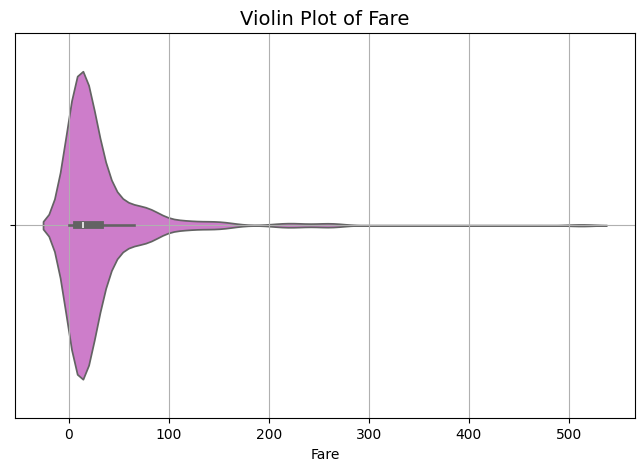

In [15]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['fare'], color='orchid')
plt.title('Violin Plot of Fare', fontsize=14)
plt.xlabel('Fare')
plt.grid(True)
plt.show()


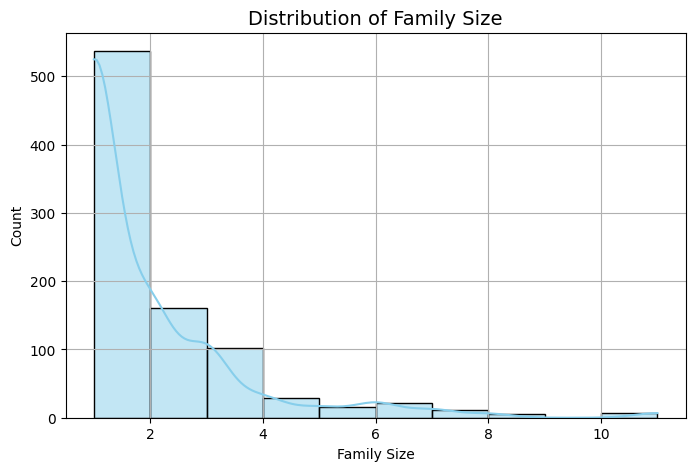

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['family_size'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Family Size', fontsize=14)
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.grid(True)
plt.show()


<ipython-input-18-5f3946292dc9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


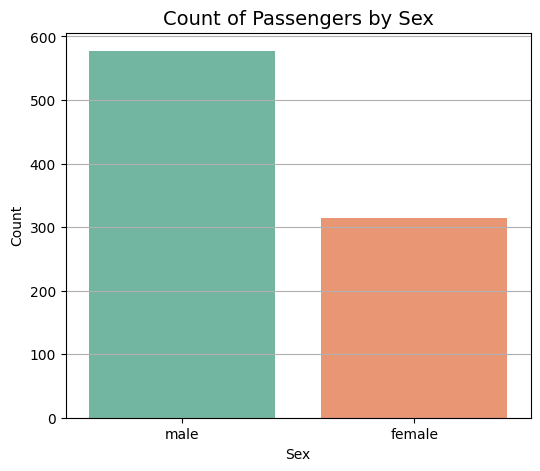

In [18]:
plt.figure(figsize=(6, 5))
sns.countplot(x='sex', data=df, palette='Set2')
plt.title('Count of Passengers by Sex', fontsize=14)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()


More males than females on board (definitely not a balanced cruise 😬).

And yet, we know "women and children first" had a dramatic twist for survival...

<Axes: ylabel='count'>

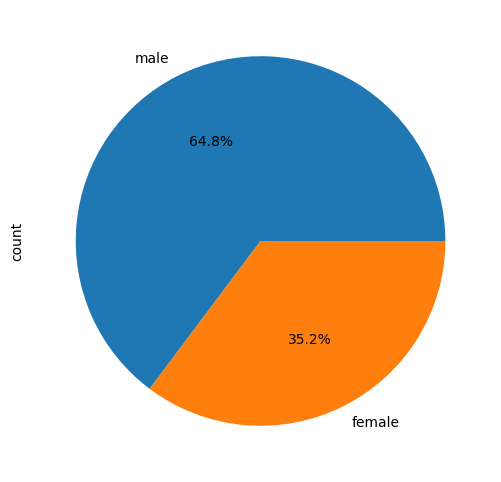

In [19]:
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))


<ipython-input-22-0bea29479fd3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='fare', data=df, palette='pastel', estimator=np.mean)


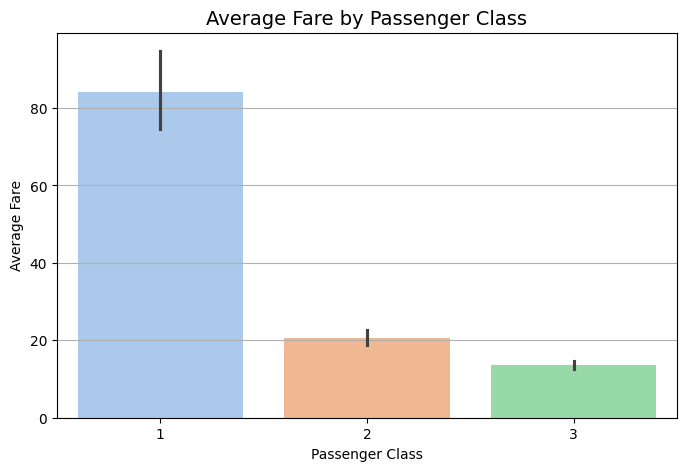

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='fare', data=df, palette='pastel', estimator=np.mean)
plt.title('Average Fare by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.grid(True, axis='y')
plt.show()




In [23]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,surname,family_size,ticket_group_size,fare_per_person,deck
0,0,3,owen harris,male,22,1,0,A/5 21171,7.2500,NaN,S,mr.,braund,2,1,7.2500,NaN
1,1,1,florence briggs thayer,female,38,1,0,PC 17599,71.2833,C85,C,mrs.,cumings,2,1,71.2833,C
2,1,3,laina,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,miss.,heikkinen,1,1,7.9250,NaN
3,1,1,lily may peel,female,35,1,0,113803,53.1000,C123,S,mrs.,futrelle,2,2,26.5500,C
4,0,3,william henry,male,35,0,0,373450,8.0500,NaN,S,mr.,allen,1,1,8.0500,NaN


<ipython-input-24-89417e2ca190>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='survived', y='fare', data=df, estimator=np.mean, palette='Set3')


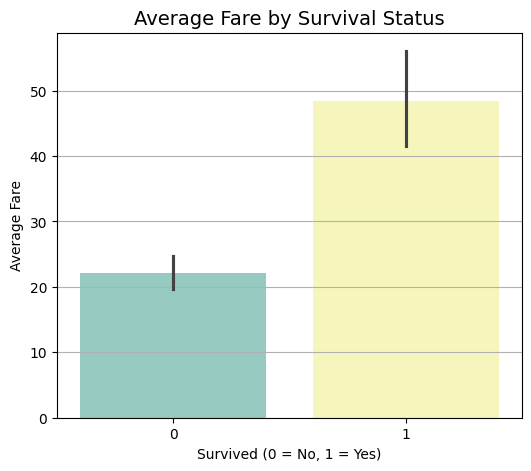

In [24]:
plt.figure(figsize=(6, 5))
sns.barplot(x='survived', y='fare', data=df, estimator=np.mean, palette='Set3')
plt.title('Average Fare by Survival Status', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Average Fare')
plt.grid(True, axis='y')
plt.show()


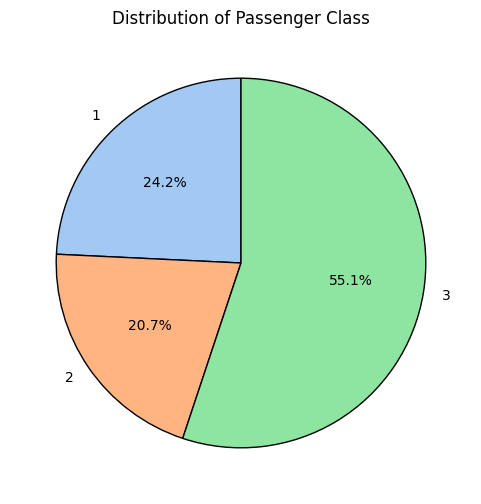

In [26]:
# Pie chart for 'pclass' column
plt.figure(figsize=(6, 6))
df['pclass'].value_counts().sort_index().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of Passenger Class')
plt.ylabel('')  # Hide y-axis label
plt.show()


3rd class dominates the ship — like a budget cruise but with way more drama.

1st class had fewer people but a lot more legroom... and lifeboat access 😬

2nd class was just vibing in the middle.

<ipython-input-28-8076e80f21bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='embarked', data=df, palette='Set2')


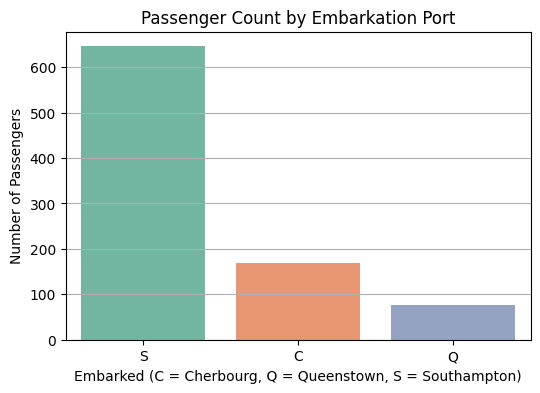

In [28]:
# Countplot for 'embarked' column
plt.figure(figsize=(6, 4))
sns.countplot(x='embarked', data=df, palette='Set2')
plt.title('Passenger Count by Embarkation Port')
plt.xlabel('Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Number of Passengers')
plt.grid(True, axis='y')
plt.show()


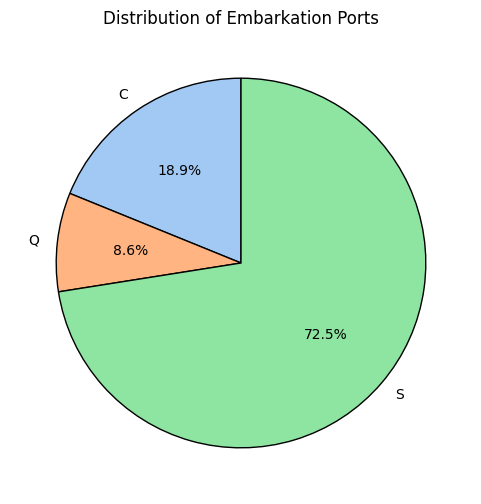

In [29]:
# Pie chart for 'embarked' column
plt.figure(figsize=(6, 6))
df['embarked'].value_counts().sort_index().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of Embarkation Ports')
plt.ylabel('')  # Hide y-axis label
plt.show()


🛳️ Southampton (S) was the most common embarkation point — the majority of passengers joined from here.

🏖️ Cherbourg (C) saw a moderate number of passengers — likely the fancy folks (a lot of 1st class boarded here).

🌊 Queenstown (Q) had the fewest — possibly last-minute budget travelers or people just in for the ride 😅

<ipython-input-31-099e7de3235a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='title', data=df, palette='tab10', order=df['title'].value_counts().index)


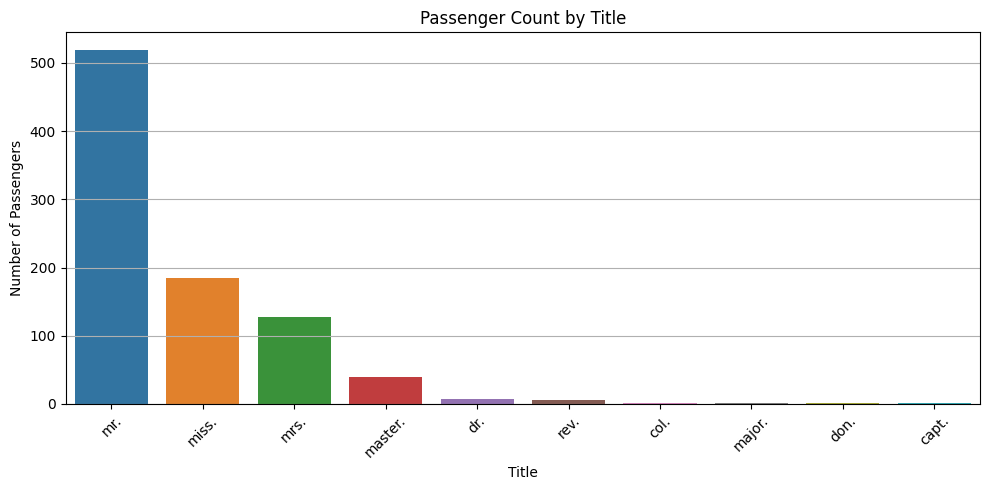

In [31]:
# Countplot for 'title' column
plt.figure(figsize=(10, 5))
sns.countplot(x='title', data=df, palette='tab10', order=df['title'].value_counts().index)
plt.title('Passenger Count by Title')
plt.xlabel('Title')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Bivariate Analysis

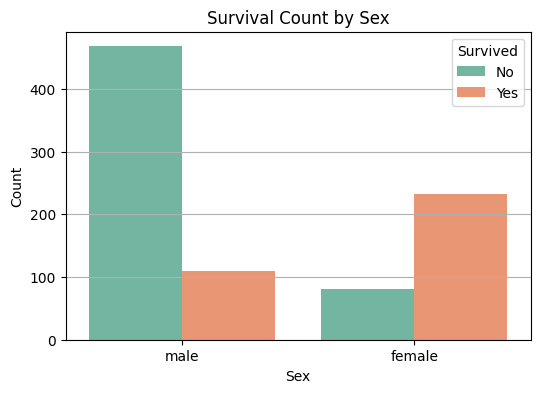

In [33]:
# Countplot for 'sex' vs 'survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='survived', data=df, palette='Set2')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


🧍‍♀️ Females had a significantly higher survival rate than males.
The countplot clearly shows women were given priority during evacuation (hello, “women and children first” 🛟).

🧍‍♂️ Males had a lower survival rate — sorry Jack, even your floating door conspiracy didn’t help 😢🚪

This makes sex a strong predictor for survival in our analysis. Definitely one to keep for modeling later 🔮

<ipython-input-35-eb05c4af0183>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=df, palette='Set2')


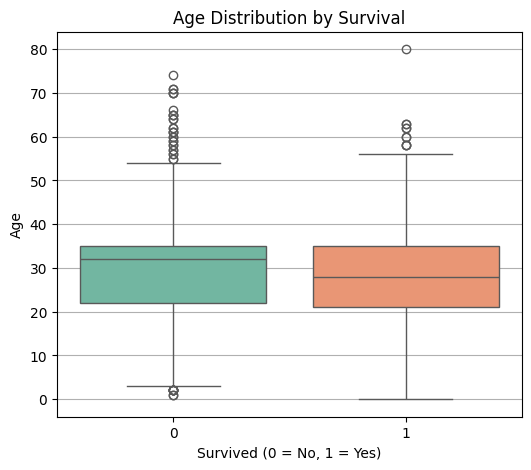

In [35]:
# Boxplot for 'age' vs 'survived'
plt.figure(figsize=(6, 5))
sns.boxplot(x='survived', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.grid(True, axis='y')
plt.show()


💀 Those who did not survive tend to have a wider and slightly older age spread.

🛟 Survivors seem to cluster more in the younger age group.

The median age of survivors appears lower — kids and young adults were more likely to be saved.

However, age alone doesn’t completely separate the groups — it’s a helpful but not all-powerful feature ⚖️

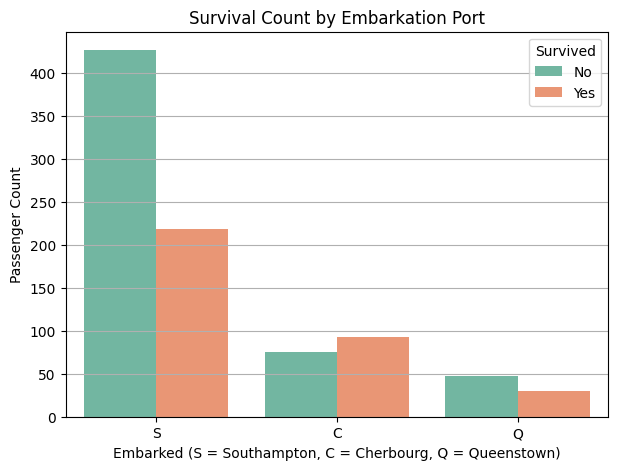

In [37]:
# Countplot for 'embarked' vs 'survived'
plt.figure(figsize=(7, 5))
sns.countplot(x='embarked', hue='survived', data=df, palette='Set2')
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Embarked (S = Southampton, C = Cherbourg, Q = Queenstown)')
plt.ylabel('Passenger Count')
plt.grid(True, axis='y')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


🛟 Cherbourg (C) passengers had the highest survival rate — many of them were rich folks in 1st class (that luxury boarding pass paid off).

⚓ Southampton (S) had the largest number of passengers, but the lowest survival rate — a lot of them were in 3rd class 😬

🌊 Queenstown (Q) had fewer passengers overall, and the survival rate was somewhere in between.

<ipython-input-38-d6e95c0409e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='embarked', y='survived', data=embarked_survival_rate, palette='Set2')


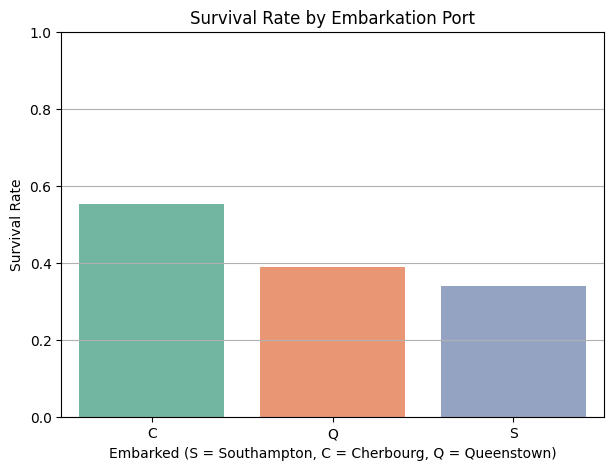

In [38]:
# Calculate survival rate per embarkation point
embarked_survival_rate = df.groupby('embarked')['survived'].mean().reset_index()

# Barplot of survival rate by embarkation port
plt.figure(figsize=(7, 5))
sns.barplot(x='embarked', y='survived', data=embarked_survival_rate, palette='Set2')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarked (S = Southampton, C = Cherbourg, Q = Queenstown)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()


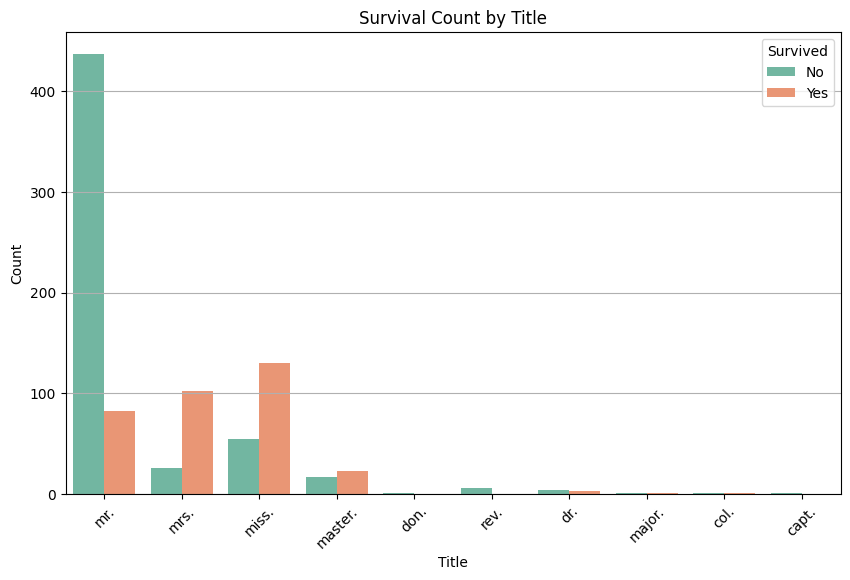

In [41]:
# Countplot for survival by title
plt.figure(figsize=(10, 6))
sns.countplot(x='title', hue='survived', data=df, palette='Set2')
plt.title('Survival Count by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


In [42]:
# Calculate survival percentage by title
title_survival_rate = df.groupby('title')['survived'].mean().sort_values(ascending=False) * 100
title_survival_rate = title_survival_rate.round(2)  # Round to 2 decimal places
title_survival_rate


,survived
title,
mrs.,79.69
miss.,70.27
master.,57.50
col.,50.00
major.,50.00
dr.,42.86
mr.,15.80
capt.,0.00
don.,0.00


👩 Mrs. and 👧 Miss. had very high survival rates — women = lifeboat priority! 💃🛟

👦 Master. (usually young boys) had very high survival too — kids were protected!

🙃 Mr. — welp, the majority didn’t make it. Respect to the fellas who held the line 💔

🎖️ Titles like Rev., Col., Major didn’t help much — the iceberg didn’t care about rank or sermons 😬

🎩 Countess, Lady, Sir — rare titles, but often survived thanks to social class (and 1st class tickets, of course).

In [43]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,surname,family_size,ticket_group_size,fare_per_person,deck
0,0,3,owen harris,male,22,1,0,A/5 21171,7.2500,NaN,S,mr.,braund,2,1,7.2500,NaN
1,1,1,florence briggs thayer,female,38,1,0,PC 17599,71.2833,C85,C,mrs.,cumings,2,1,71.2833,C
2,1,3,laina,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,miss.,heikkinen,1,1,7.9250,NaN
3,1,1,lily may peel,female,35,1,0,113803,53.1000,C123,S,mrs.,futrelle,2,2,26.5500,C
4,0,3,william henry,male,35,0,0,373450,8.0500,NaN,S,mr.,allen,1,1,8.0500,NaN


In [44]:
# Calculate survival percentage by family_size
title_survival_rate = df.groupby('family_size')['survived'].mean().sort_values(ascending=False) * 100
title_survival_rate = title_survival_rate.round(2)  # Round to 2 decimal places
title_survival_rate


,survived
family_size,
4,72.41
3,57.84
2,55.28
7,33.33
1,30.35
5,20.00
6,13.64
8,0.00
11,0.00


<ipython-input-45-128b163552e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='family_size', y='survived', data=family_survival_rate, palette='coolwarm')


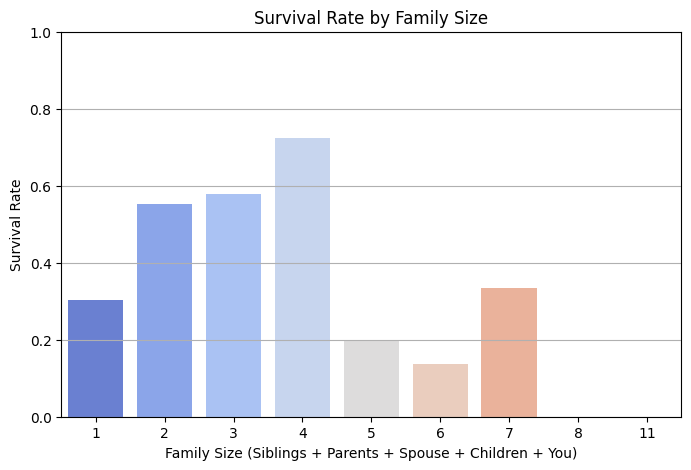

In [45]:
# Calculate survival rate by family size
family_survival_rate = df.groupby('family_size')['survived'].mean().reset_index()

# Plot it
plt.figure(figsize=(8, 5))
sns.barplot(x='family_size', y='survived', data=family_survival_rate, palette='coolwarm')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size (Siblings + Parents + Spouse + Children + You)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()


In [54]:
# Filter solo travelers
solo_travelers = df[df['family_size'] == 1]

# Count of males and females among solo travelers
solo_counts = (solo_travelers['sex'].value_counts(normalize=True))*100
print(solo_counts)


sex
male      76.536313
female    23.463687
Name: proportion, dtype: float64


In [55]:
# Filter solo travelers
solo_travelers = df[df['family_size'] == 1]

# Group by gender and survival, then normalize within gender
solo_survival_rate = (
    solo_travelers.groupby('sex')['survived']
    .value_counts(normalize=True)
    .unstack()
    * 100
).round(2)

# Rename columns for clarity
solo_survival_rate.columns = ['Did Not Survive', 'Survived']

print(solo_survival_rate)


        Did Not Survive  Survived
sex                              
female            21.43     78.57
male              84.43     15.57


<ipython-input-56-ca700bc4d850>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_by_gender, x='sex', y='Survival Rate (%)', palette='pastel')


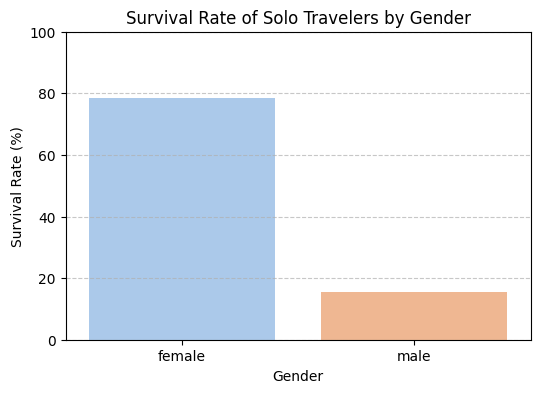

In [56]:
# Filter solo travelers
solo_travelers = df[df['family_size'] == 1]

# Calculate survival rate by gender
survival_by_gender = (
    solo_travelers.groupby('sex')['survived']
    .mean()
    .multiply(100)
    .round(2)
    .reset_index()
    .rename(columns={'survived': 'Survival Rate (%)'})
)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=survival_by_gender, x='sex', y='Survival Rate (%)', palette='pastel')
plt.title('Survival Rate of Solo Travelers by Gender')
plt.ylim(0, 100)
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


🧍‍♂️ ~76% solo travelers were men — lone wolves or victims of bad luck? You decide.

🧍‍♀️ ~24% were women — flying solo back in 1912? Brave queens 👑

Imagine Titanic with a Tinder app: “Distance: 10 meters, Status: Sinking 🚨”

<ipython-input-58-ff7ae5fc5b43>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sex_survival, x='sex', y='Survival Rate (%)', palette='Set2')


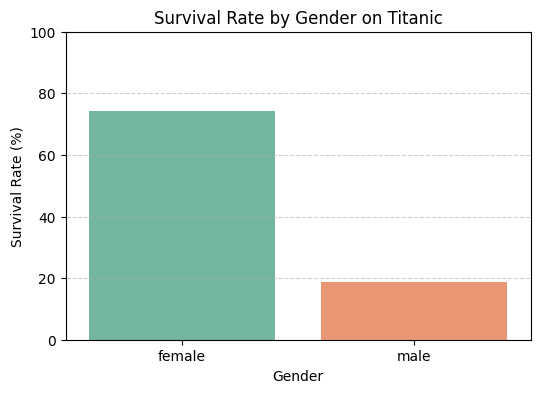

In [58]:
# Survival rate by sex (in %)
sex_survival = (
    df.groupby('sex')['survived']
    .mean()
    .multiply(100)
    .round(2)
    .reset_index()
    .rename(columns={'survived': 'Survival Rate (%)'})
)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=sex_survival, x='sex', y='Survival Rate (%)', palette='Set2')
plt.title('Survival Rate by Gender on Titanic')
plt.ylim(0, 100)
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Females: High survival rate (Queen energy 👑)

Males: Survival rate lower than Jack’s body temp 💀🥶

<ipython-input-59-cb4a2caec224>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pclass_survival, x='pclass', y='Survival Rate (%)', palette='coolwarm')


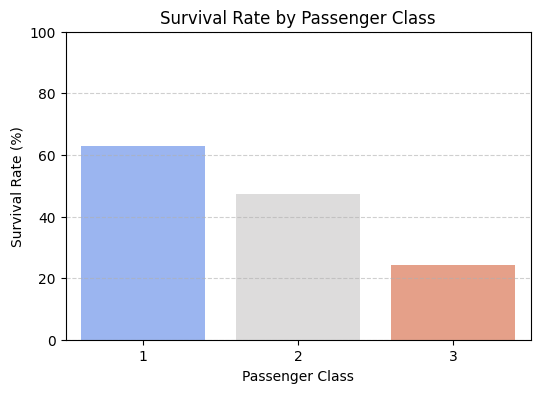

In [59]:
# Calculate survival rate by class
pclass_survival = (
    df.groupby('pclass')['survived']
    .mean()
    .multiply(100)
    .round(2)
    .reset_index()
    .rename(columns={'survived': 'Survival Rate (%)'})
)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=pclass_survival, x='pclass', y='Survival Rate (%)', palette='coolwarm')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Passenger Class')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


1st class: “I paid for luxury AND a lifeboat!” 💼🛟

2nd class: Mid-tier = mid-chances 🫠

3rd class: “All we got was the iceberg” ❄️

🧠 What We Learned from Bivariate Analysis:
💸 Fare vs Survival: Money can buy life—at least on the Titanic.

🎩 Title vs Fare: Nobility = 💰 = cushy cabins + lifeboats.

💼 Pclass vs Survival: Rich get the rafts, poor get the violins.

👨‍👩‍👧‍👦 Family Size: Not too big, not too small = survival sweet spot.

🛶 Embarked Port vs Survival: Southampton? Eh. Cherbourg? Jackpot!

🚶‍♂️ Solo Travelers: Males solo = doomed. Females solo = slightly luckier.

Multivariate analysis

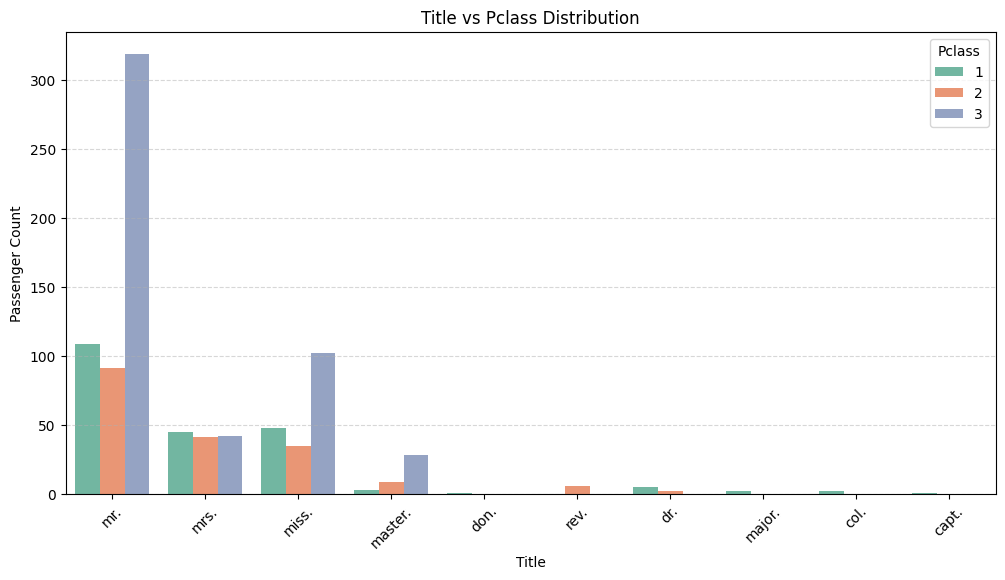

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='title', hue='pclass', palette='Set2')
plt.title('Title vs Pclass Distribution')
plt.xlabel('Title')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Pclass')
plt.show()


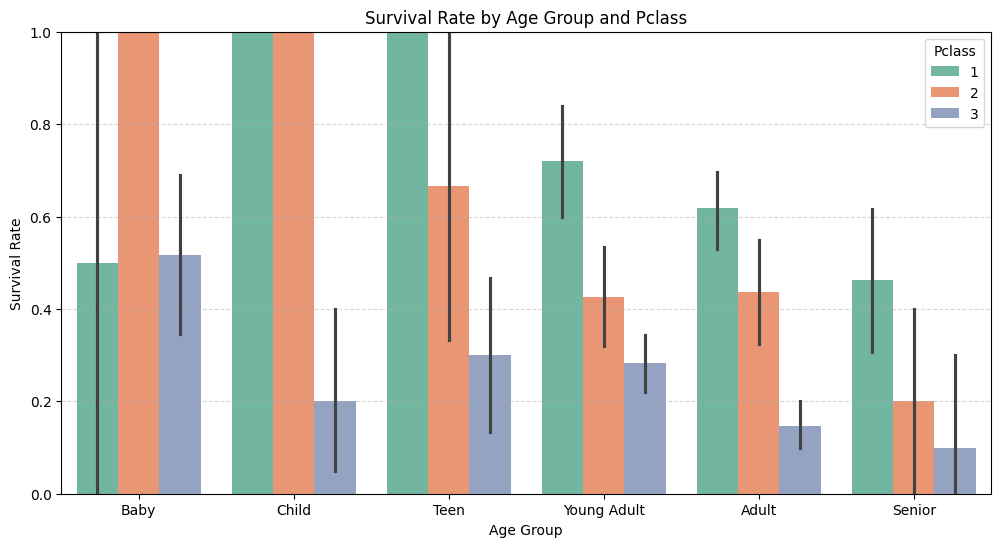

In [65]:
# Step 1: Define age groups
bins = [0, 5, 12, 17, 30, 50, 100]
labels = ['Baby', 'Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Step 2: Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='age_group', y='survived', hue='pclass', palette='Set2')
plt.title('Survival Rate by Age Group and Pclass')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Pclass')
plt.show()


👶 Babies in 1st class? Saved. Titanic was like: “Protect the premium babies!”

👩‍🎓 Teens in 3rd class? Oof... iceberg gave them no teenage dream.

🧓 Seniors in 2nd class? The ship played no favorites.